In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [63]:
df = pd.read_csv('../data/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)

# randomize the rows
df = df.sample(frac=1).reset_index(drop=True)

df

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

In [65]:
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [66]:
y_predicted = svm.predict(X_test)

In [67]:
accuracy_score(y_test, y_predicted)*100

91.81818181818183

In [68]:
y_predicted_train = svm.predict(X_train)
accuracy_score(y_train, y_predicted_train)*100

93.97727272727273

In [69]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[107,   6],
       [ 12,  95]], dtype=int64)

In [70]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       113
           1       0.94      0.89      0.91       107

    accuracy                           0.92       220
   macro avg       0.92      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220



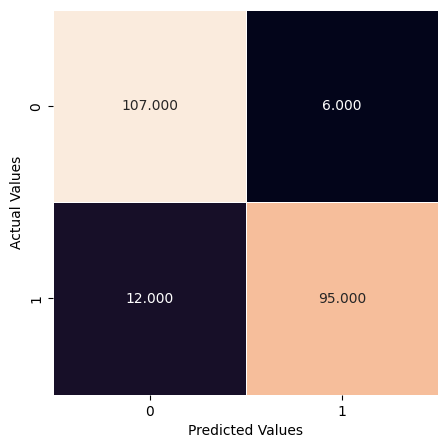

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
